In [1]:
import pandas as pd

df = pd.read_excel('data/xlsx/PreciosBlue.xlsx')
print(df)


      Unnamed: 0      Fecha  Compra   Venta
0              0 2023-01-24  377.00  381.00
1              1 2023-01-24  372.00  376.00
2              2 2023-01-23  372.00  376.00
3              3 2023-01-20  370.00  374.00
4              4 2023-01-19  373.00  377.00
...          ...        ...     ...     ...
3216        3216 2010-01-08    3.87    3.87
3217        3217 2010-01-07    3.86    3.87
3218        3218 2010-01-06    3.87    3.88
3219        3219 2010-01-05    3.86    3.86
3220        3220 2010-01-04    3.86    3.86

[3221 rows x 4 columns]


In [2]:
df = pd.DataFrame(df)
df

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-24,377.00,381.00
1,1,2023-01-24,372.00,376.00
2,2,2023-01-23,372.00,376.00
3,3,2023-01-20,370.00,374.00
4,4,2023-01-19,373.00,377.00
...,...,...,...,...
3216,3216,2010-01-08,3.87,3.87
3217,3217,2010-01-07,3.86,3.87
3218,3218,2010-01-06,3.87,3.88
3219,3219,2010-01-05,3.86,3.86


In [3]:
df.head()

,Unnamed: 0,Fecha,Compra,Venta
0,0,2023-01-24,377.0,381.0
1,1,2023-01-24,372.0,376.0
2,2,2023-01-23,372.0,376.0
3,3,2023-01-20,370.0,374.0
4,4,2023-01-19,373.0,377.0


In [4]:
df.index # it is an attribute, not function

RangeIndex(start=0, stop=3221, step=1)

In [5]:
df.drop(df.columns[0], axis=1, inplace=True)
df.rename(columns={0: 'Fecha', 1: 'Compra', 2: 'Venta'}, inplace=True)
df

,Fecha,Compra,Venta
0,2023-01-24,377.00,381.00
1,2023-01-24,372.00,376.00
2,2023-01-23,372.00,376.00
3,2023-01-20,370.00,374.00
4,2023-01-19,373.00,377.00
...,...,...,...
3216,2010-01-08,3.87,3.87
3217,2010-01-07,3.86,3.87
3218,2010-01-06,3.87,3.88
3219,2010-01-05,3.86,3.86


In [6]:
df.describe()

,Compra,Venta
count,3221.000000,3221.000000
mean,56.622928,58.238913
std,80.401755,82.261998
min,3.860000,3.860000
25%,8.340000,8.370000
50%,15.360000,15.670000
75%,66.250000,69.750000
max,377.000000,381.000000


In [7]:
df['Compra'] = pd.to_numeric(df['Compra'])
df['Venta'] = pd.to_numeric(df['Venta'])
df

,Fecha,Compra,Venta
0,2023-01-24,377.00,381.00
1,2023-01-24,372.00,376.00
2,2023-01-23,372.00,376.00
3,2023-01-20,370.00,374.00
4,2023-01-19,373.00,377.00
...,...,...,...
3216,2010-01-08,3.87,3.87
3217,2010-01-07,3.86,3.87
3218,2010-01-06,3.87,3.88
3219,2010-01-05,3.86,3.86


In [8]:
df.to_pickle('data/pkl/PreciosBlue.xlsx.pkl')

In [9]:
df.set_index('Fecha', inplace=True)
df.index = pd.to_datetime(df.index, format='%d-%m-%Y')

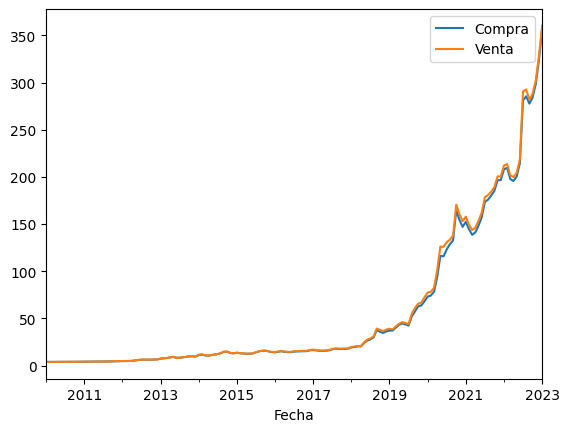

In [10]:
df.resample(rule='M').mean().plot(); # Historico

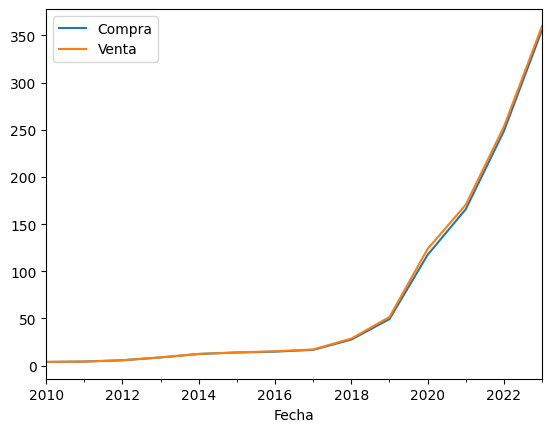

In [11]:
df.resample(rule='AS').mean().plot(); # AS Primer año

[Text(0.5, 1.0, 'Promedio valor Dolar')]

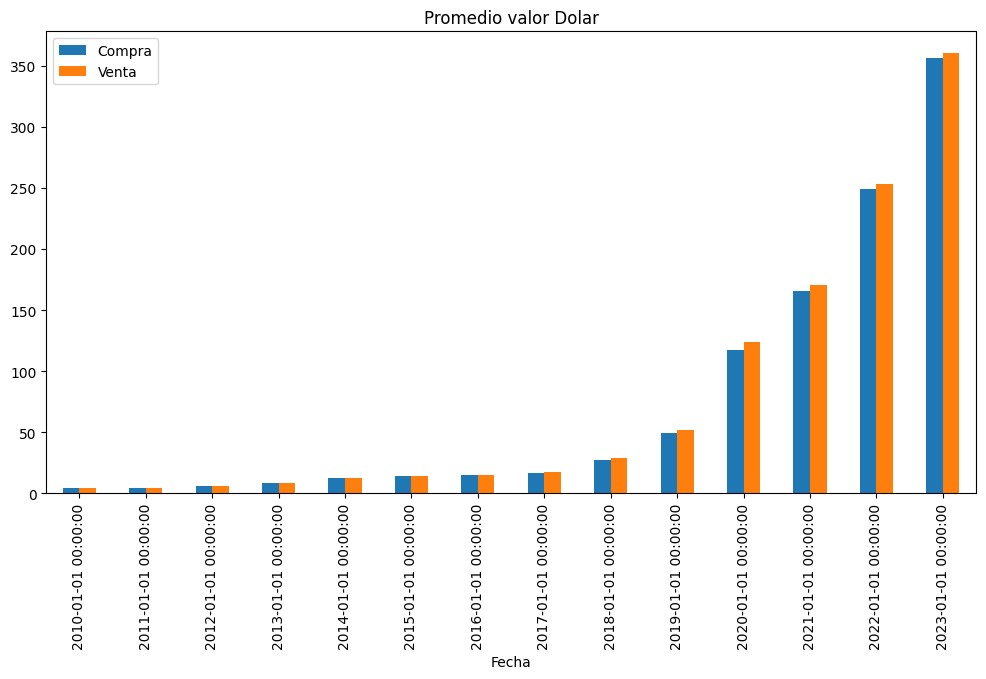

In [12]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))
ax.set(title='Promedio valor Dolar')

<AxesSubplot:xlabel='Fecha'>

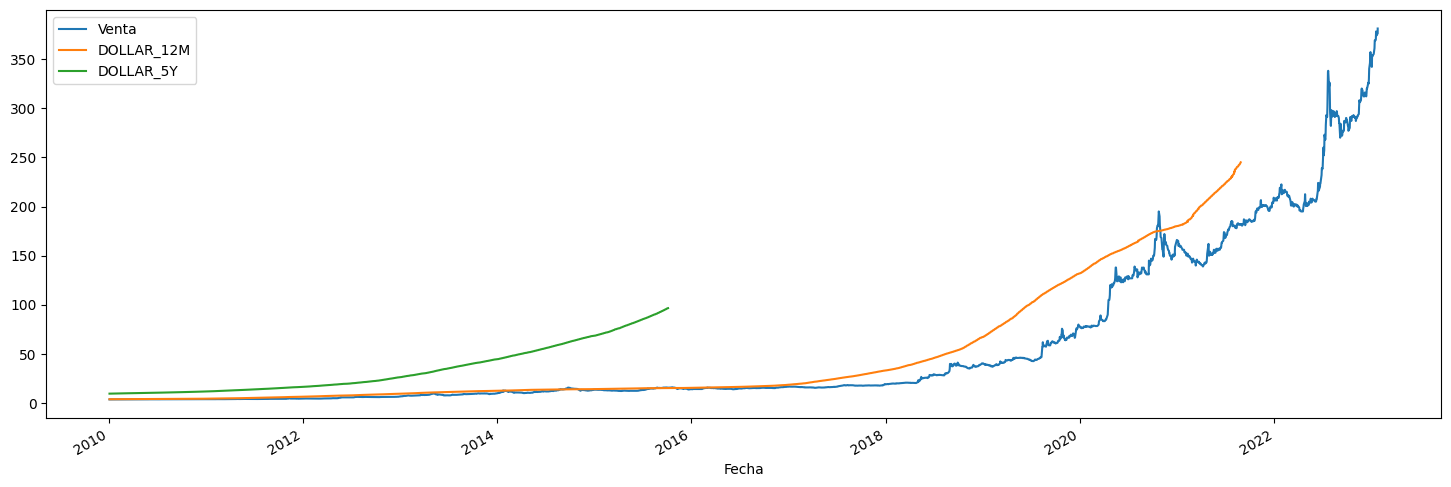

In [13]:
df['DOLLAR_12M'] = df['Venta'].rolling(window=365).mean()
df['DOLLAR_5Y'] = df['Venta'].rolling(window=365*5+1).mean()
df[['Venta','DOLLAR_12M','DOLLAR_5Y']].plot(figsize=(18,6))

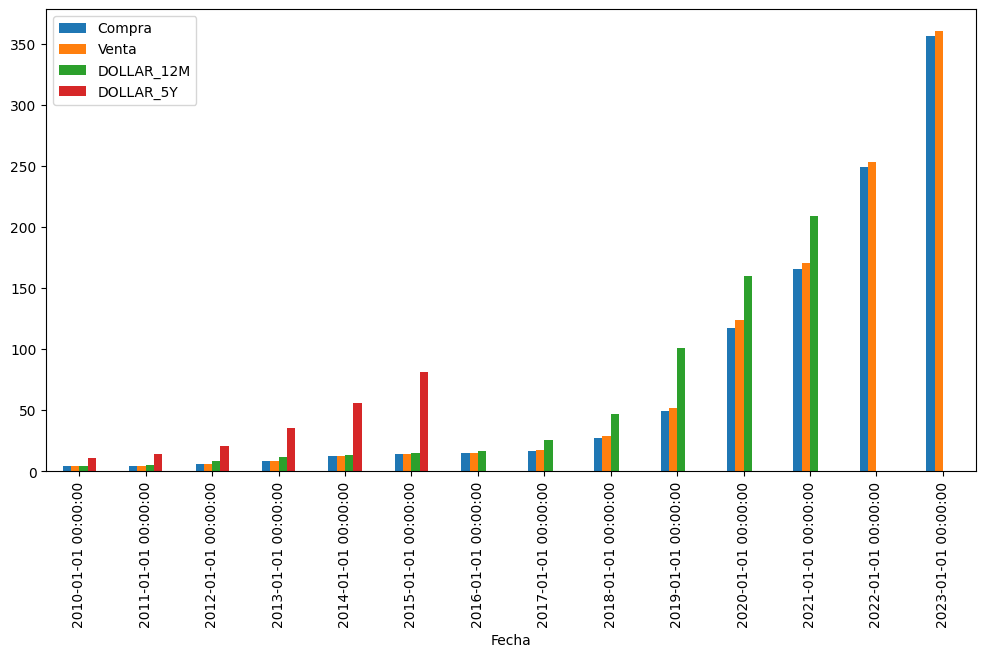

In [14]:
ax = df.resample(rule='AS').mean().plot.bar(figsize=(12,6))

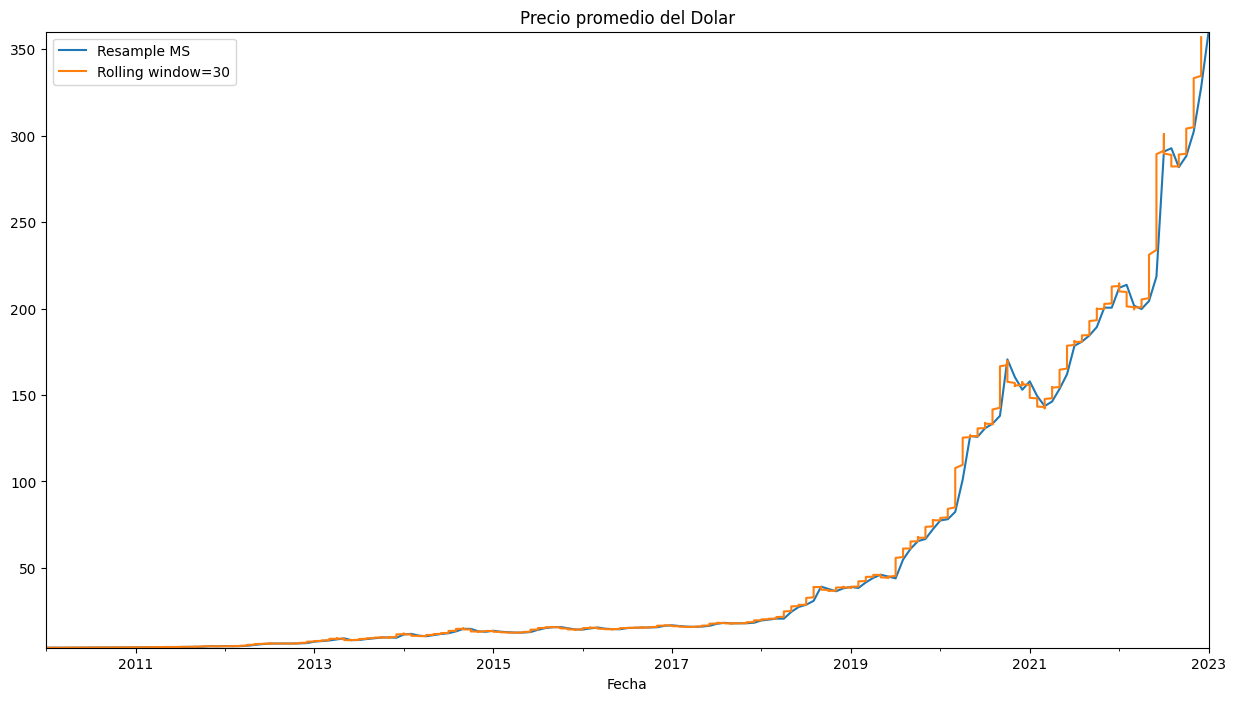

In [15]:
ax = df['Venta'].resample(rule='M').mean().plot(figsize=(15,8), label='Resample MS') # monthly resampled mean
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(label='Rolling window=30') # monthly rolling windows/moving average
ax.set(title='Precio promedio del Dolar')
ax.legend()

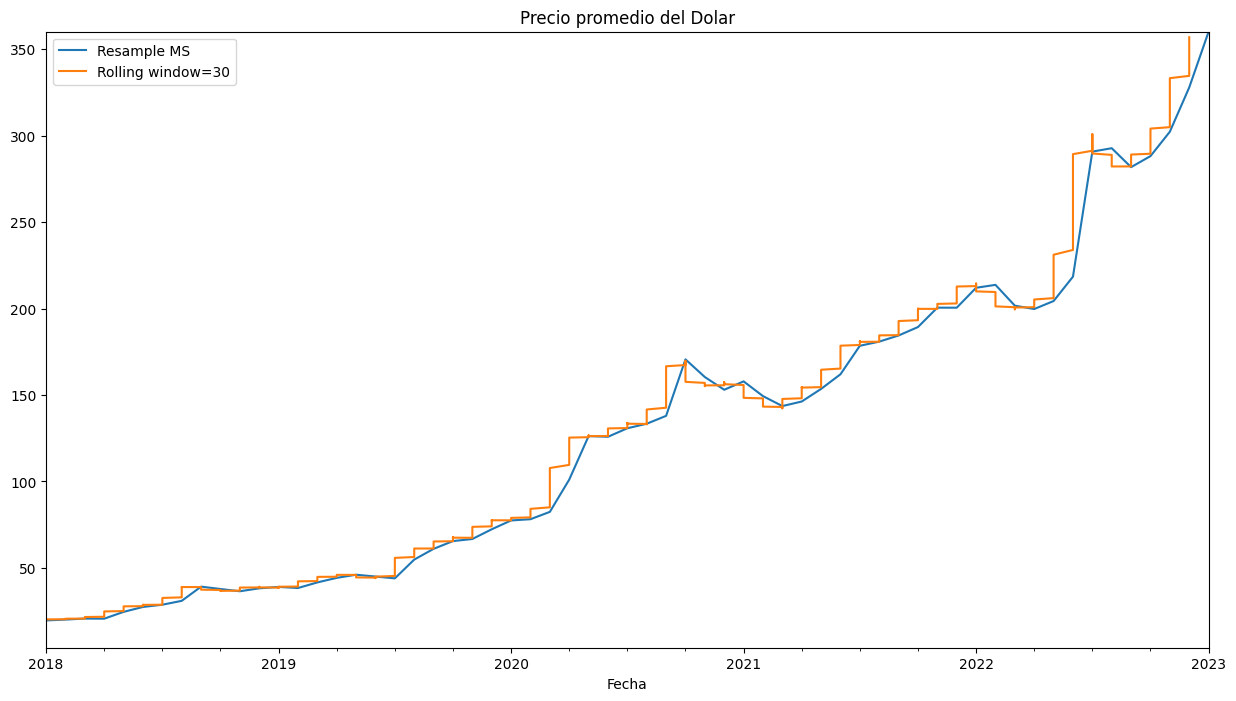

In [16]:
from datetime import datetime

ax = df['Venta'].resample(rule='M').mean().plot(xlim=['2018-01-01', datetime.now()], figsize=(15,8), label='Resample MS')
ax.autoscale(tight=True)
df.rolling(window=30).mean()['Venta'].plot(xlim=['2018-01-01',datetime.now()],label='Rolling window=30')
ax.set(title='Precio promedio del Dolar')
ax.legend()


<AxesSubplot:xlabel='Fecha'>

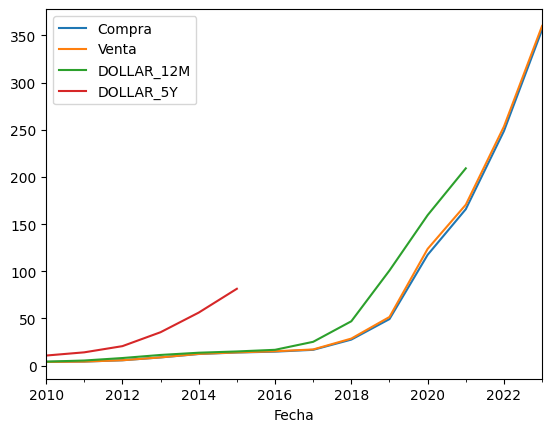

In [17]:
df.resample(rule='1y').mean().plot() #1y = 1 years

<AxesSubplot:xlabel='Fecha'>

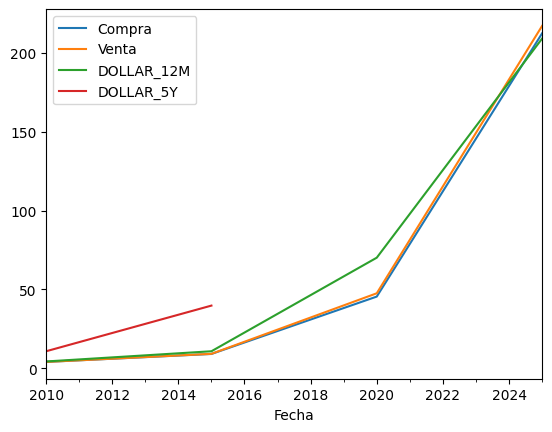

In [18]:
df.resample(rule='5y').mean().plot() #5y = 5 years

<AxesSubplot:xlabel='Fecha'>

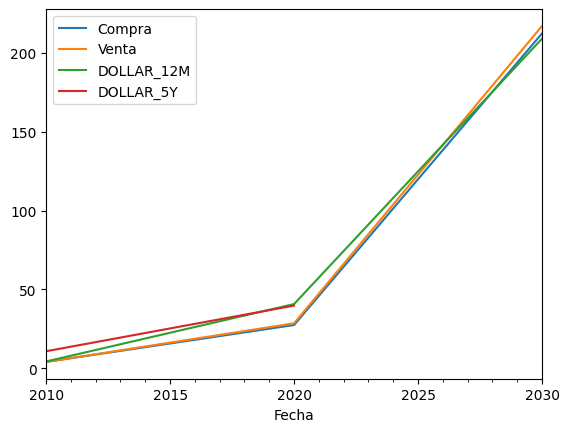

In [19]:
df.resample(rule='10y').mean().plot()

<AxesSubplot:xlabel='Fecha'>

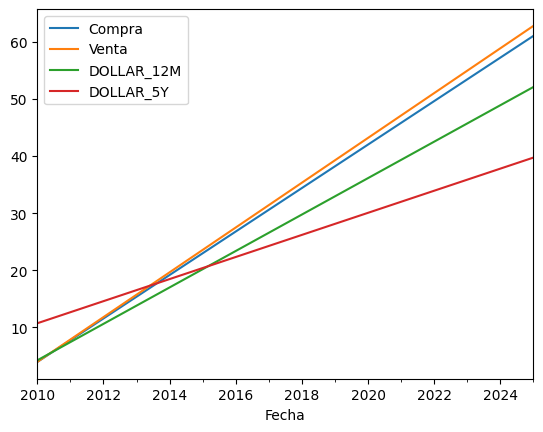

In [20]:
df.resample(rule='15y').mean().plot()